# **A Deep Learning Model to Predict Customer Churn in The Telecom Industry**


##**1. Statement of the Problem**
> Churn rate is a metric that gives the total percentage of customers who discontinue their subscriptions within a particular period. Notably, a high churn rate could potentially affect a company's profitablity and its growth.

> It is crucial to keep track of a company's churn rate by looking out for patterns among the customers who discontinue their subscripitons in order to develop strategies that will help better the services and in the long run retain the customers for a long period.

> In this project, we will do an exploratory data analysis on a Telco dataset obtained from Kaggle to identify what the customers who churned had in common and also develop a deep learning model for a churn prediction.





### 1.1 Objectives

* Are there any patterns in churn customers based on gender?
* Are there any patterns based on churn based on the paymment method?
* Create an artificial neural network model that predicts customer churn rate
  



### 1.2 Defining the Metric for Success

> Being able to create a deep learning model to predict customer churn in the telecom industry with an accuracy of 95%





###1.3 Understanding the Context

The data set includes information about:


*  **Customers who left within the last month**-the column is called Churn
*   **Services that the customers signed up for**-phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


*   **Customer account information**- how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*   **Customer Demographics** – gender, age range, and if they have partners and dependents

### 1.4 Recording the Experimental Design

Perform the following operations:

* Define the research question
* Load data and preview the dataset
* Data cleaning
* Perform univariate, bivariate analysis 
* Implement the solution
* Challenge the solution 





### 1.5 Understanding the variables



The data set includes information about:


*  **Customers who left within the last month**-the column is called Churn
*   **Services that each customer has signed up for**-phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


*   **Customer account information**- how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*   **Demographic info about customers** – gender, age range, and if they have partners and dependents





##**2. Reading the Data**

In [141]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [142]:
#Loading our dataset

df=pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [143]:
# Check the shape of the data shape 
df.shape

(7043, 21)

**Observation**

> Our dataset has 7043 rows and 21 columns

In [144]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
> There are no NAN values in the 21 columns

> The data types are in object, float and integer forms; we need to correct the TotalCharges column datatype to float

> One column is in float; 2 columns are in integers; 18 are in objects.

In [145]:
# Statistical summary of the numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Observation**

>  The mean and max of the MonthlyCharges is 64.761692 and 118.75 respectively 

>  We need to convert the TotalCharges datatype from object to float for it to appear in our statistical summary


##**3. Data Cleaning**
> Data cleaning will involve fixing bad data in your data set. The bad data could be:

* Null values
* Data in wrong format
* Wrong data
* Duplicates


In [64]:
# Check for null values
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**Observation**

> False output shows that there are no missing values; but we have to change the TotalCharges column into the right datatype

In [65]:
# Return the no of missing values in the TotalCharges column
sum(df.isnull().values.ravel())

0

**Observation**

> There are 11 missing values in the TotalCharges column

> We can drop the missing rows 

In [66]:
# Convert the TotalCharges column into the correct datatype

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**

> We have converted the TotalCharges column to float from object

In [67]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

**Observation**

> There are null values in the TotalCharges column

In [68]:
# Drop the rows with 11 missing data 
# Store in a new dataframe df1

df1 = df[df['TotalCharges'].notna()]


In [69]:
# Confirm to see if we have any null values after dropping

sum(df1.isnull().values.ravel())

0

**Observation**

> The output is zero; meaning there are no missing values

In [70]:
# Get the ajusted statistical summary with the added TotalCharges column

df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [71]:
#Drop the unnecessary customerID column
df1.drop(columns=['customerID'], axis=1, inplace=True)

**Observation**

> We have dropped the customerID column which will be unnecessary in our analysis

In [72]:
# Convert  the SeniorCitizen column into categorical var
df1["SeniorCitizen"]= df1["SeniorCitizen"].map({0: "No", 1: "Yes"})
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Observation**

> We have converted the numeric values of the Senior Citizen variable  into categorical

>'No' represents 0 and 'Yes' represents 1



##**4. Exploratory Data Analysis**

> EDA is used to investigate the dataset and summarize the key insights. It gives the basic understanding of the data, it's distribution, and relationship between variables. Grapghs and python functions are used to explore the data. There will be two type of analysis; univariate and bivariate analysis

### 4.1 Univariate Analysis

In [73]:
# Ratio of our target variable
df1['Churn'].value_counts()/len(df1['Churn'])*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

**Observation**

> Our data is higly imbalanced; the ratio is 73:27

> The churners are 27% while the non-churners are 73%

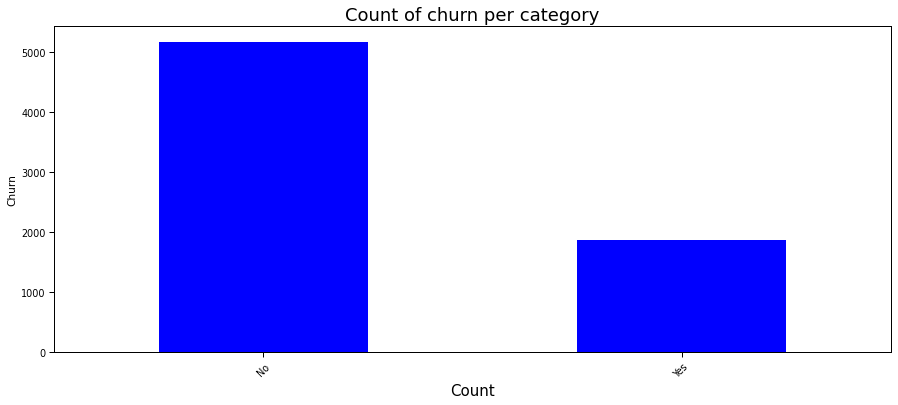

In [74]:
# Horizontal bar of our target variable

df1['Churn'].value_counts().plot(kind='bar', figsize=(15,6), color='b')
plt.xlabel('Count', fontsize= 15)
plt.ylabel('Churn')
plt.xticks(rotation = 45)
plt.title('Count of churn per category', fontsize = 18);

**Observation**

> There is imbalance in our target variable 


> The numbers of customers who churn is low as compared to those who don't churn

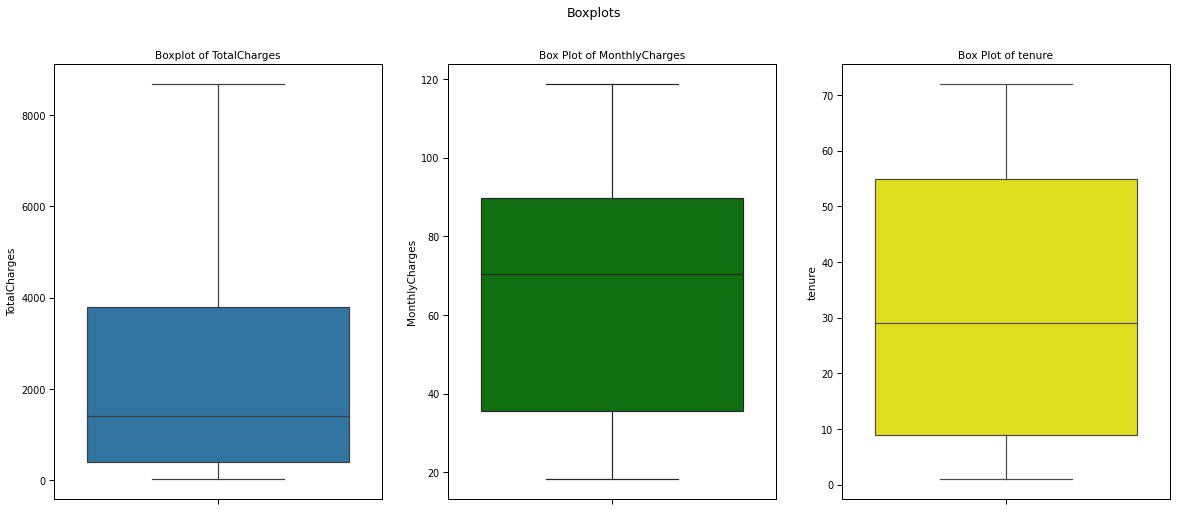

In [75]:
# Check for outliers using boxplot

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df1, y = 'TotalCharges', ax=ax[0])
ax[0].set_title('Boxplot of TotalCharges')
sns.boxplot(data=df1, y = 'MonthlyCharges', ax=ax[1], color = 'green')
ax[1].set_title('Box Plot of MonthlyCharges')
sns.boxplot(data=df1, y = 'tenure', ax=ax[2], color = 'yellow')
ax[2].set_title('Box Plot of tenure');

**Observation**

> There are no outliers in the TotalCharges, MonthlyCharges and tenure columns

> 

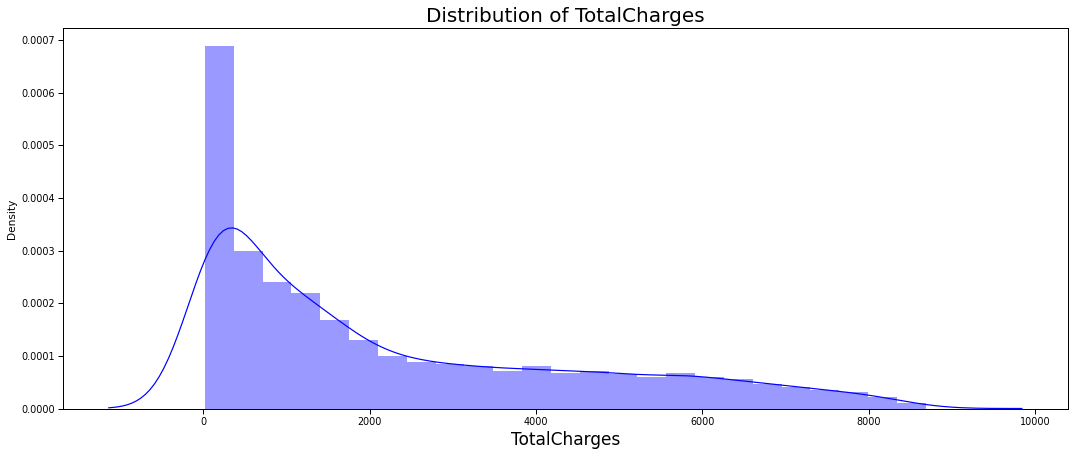

In [76]:
# TotalCharges distribution plot
plt.figure(figsize=(18,7))
plt.title("Distribution of TotalCharges", fontsize = 20)
plt.xlabel('TotalCharges', fontsize = 17)
ax = sns.distplot(df1["TotalCharges"], color = 'b')
plt.show()

**Observation**

> Majority of the customers were charged between 0-2000

> The distribution shows skeweness to the right(positive skewed)

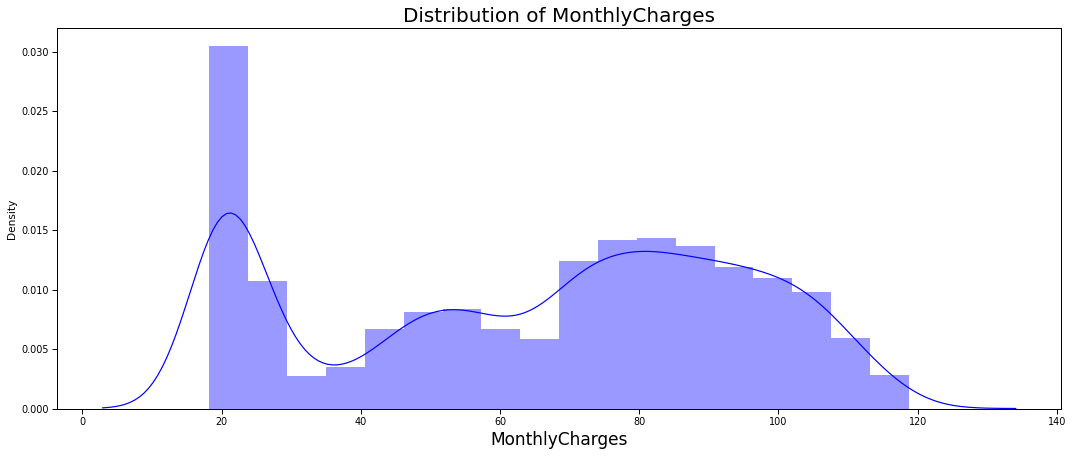

In [77]:
# MonthlyCharges distribution plot

plt.figure(figsize=(18,7))
plt.title("Distribution of MonthlyCharges", fontsize = 20)
plt.xlabel('MonthlyCharges', fontsize = 17)
ax = sns.distplot(df1["MonthlyCharges"], color = 'b')
plt.show()

**Observation**
 

*   The Monthly charges lie towards high values showing a positive skew in the variable.
*   Most customers pay a monthly charge of between 18 and 30.



In [79]:
# Check the frequency of SeniorCitizens
df1['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

**Observation**

> Majority of the customers are young.

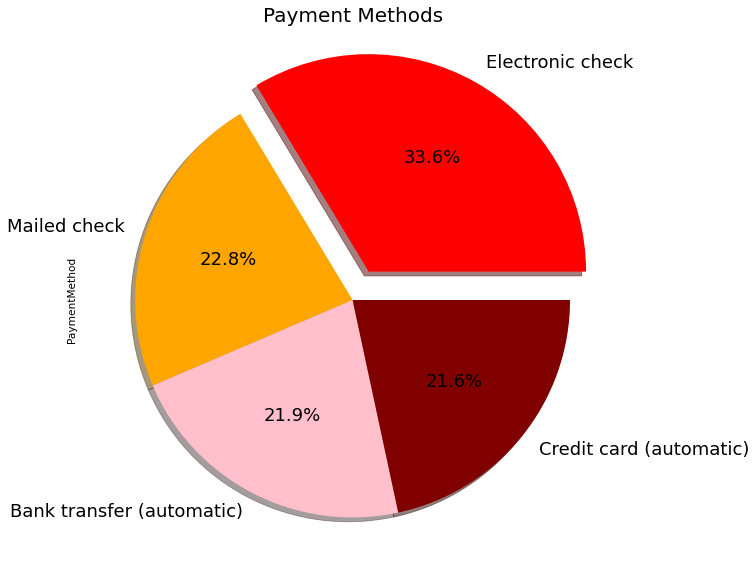

In [80]:
# Pie chart showing the various payment methods
plt.figure(figsize=(20,10))
colors = ['red', 'orange', 'pink', 'maroon']
Explode=[0.15,0,0,0]
df1['PaymentMethod'].value_counts().plot.pie(colors=colors, explode=Explode, autopct='%1.1f%%', shadow=True,textprops={'fontsize': 18})
plt.title('Payment Methods', fontsize=20);

**Observation**

> 33.6% of the customers use electronic check for payments 


> 22.8% of the customers use mailed checks

> 21.9% and 21.6% of the customers use bank transfers and credit cards respectively 

In [81]:
# Divide the customers into bins of 12 months based on tenure
# That is, < 12 months; 1 year: 13-24 months; 1-2 years etc

# Let's print the max tenure in our data

#print(df1['tenure'].max())

**Observation**

> We have a maximum of 72 months

### 4.2 Bivariate Analysis

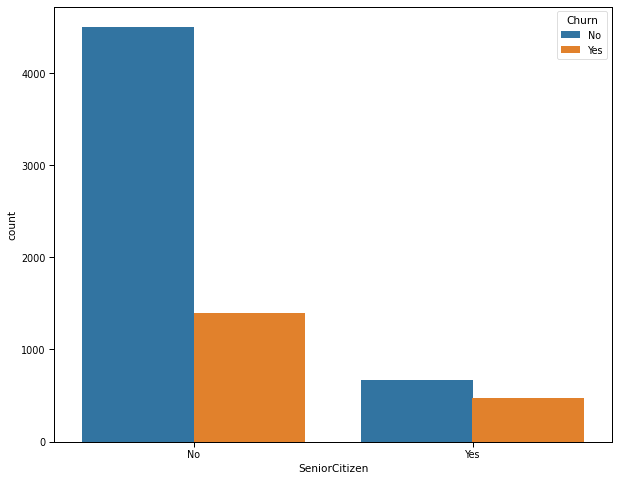

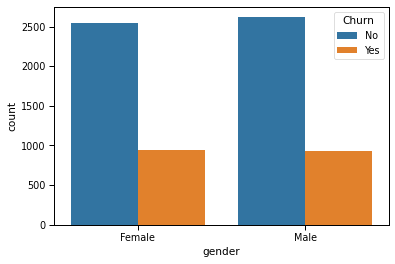

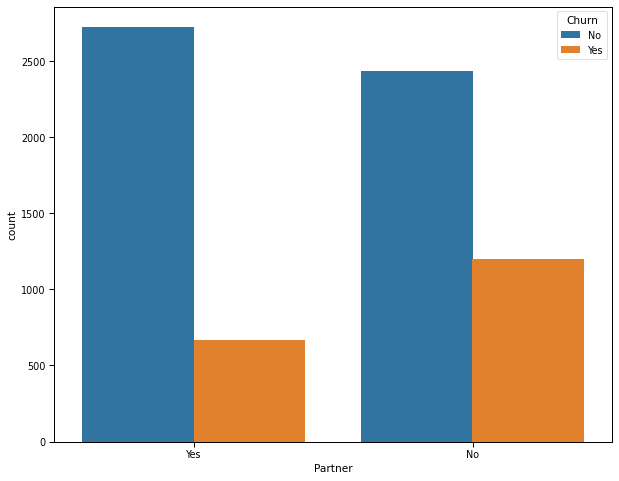

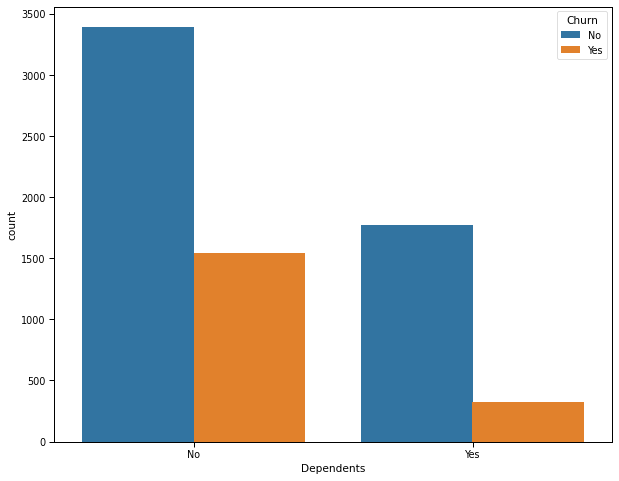

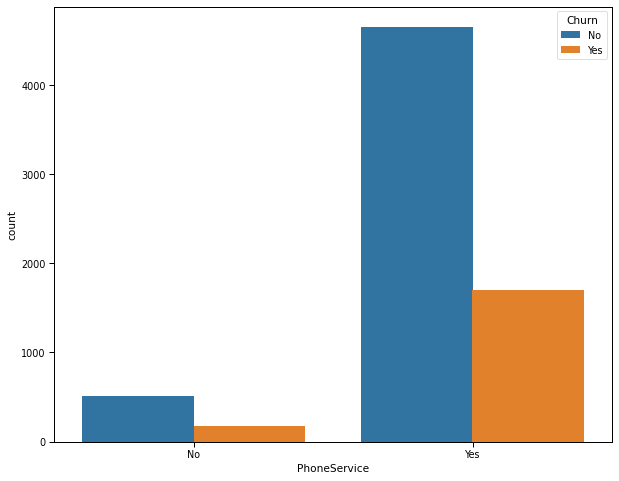

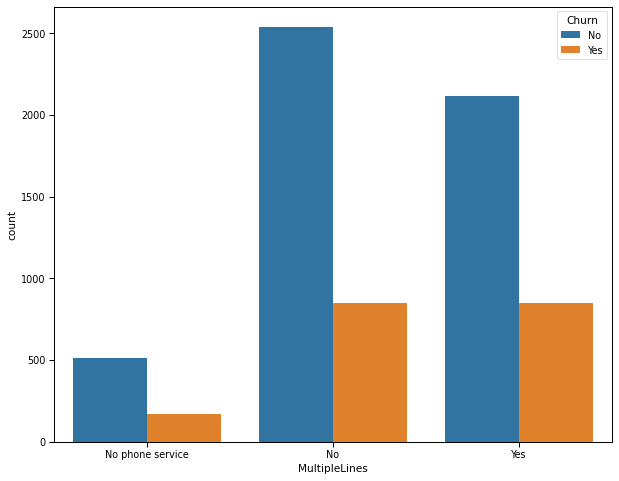

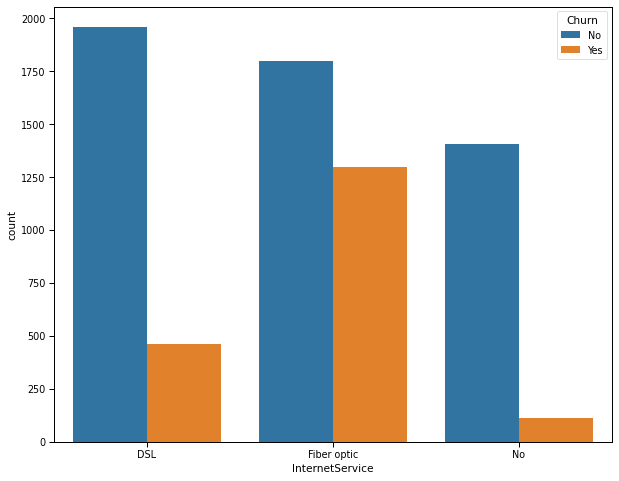

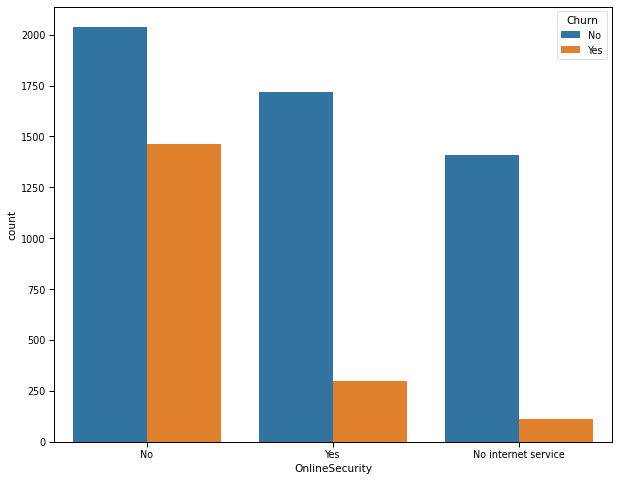

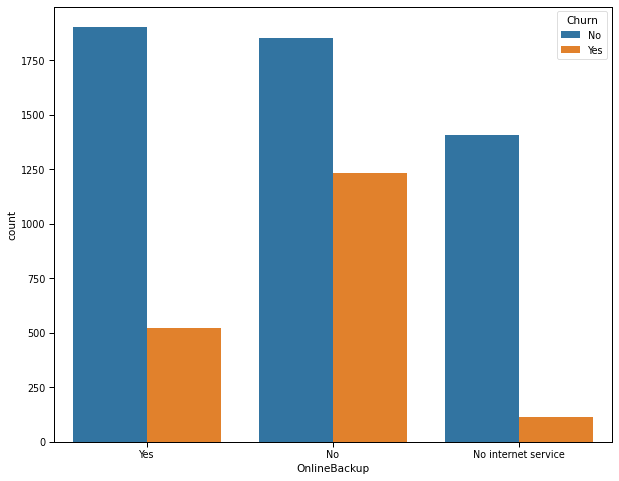

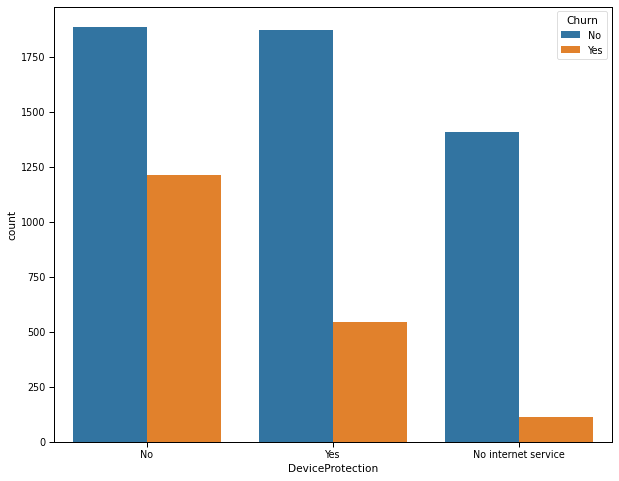

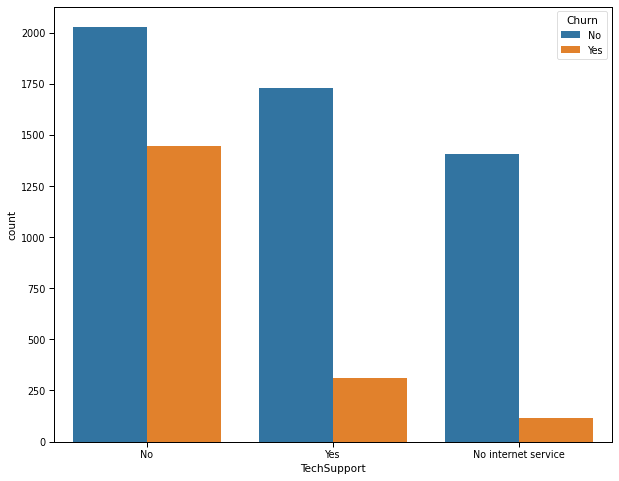

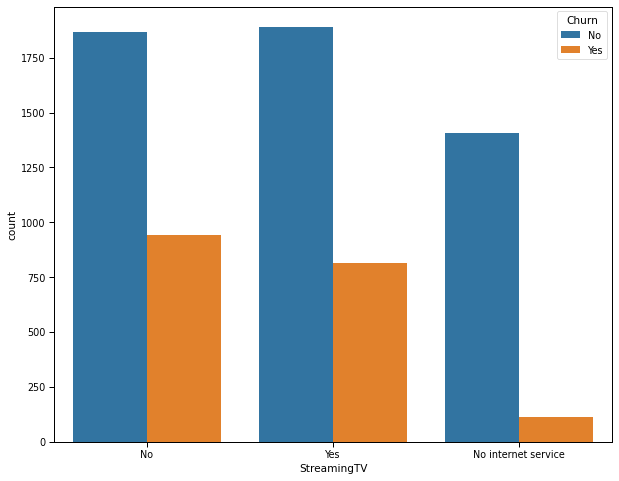

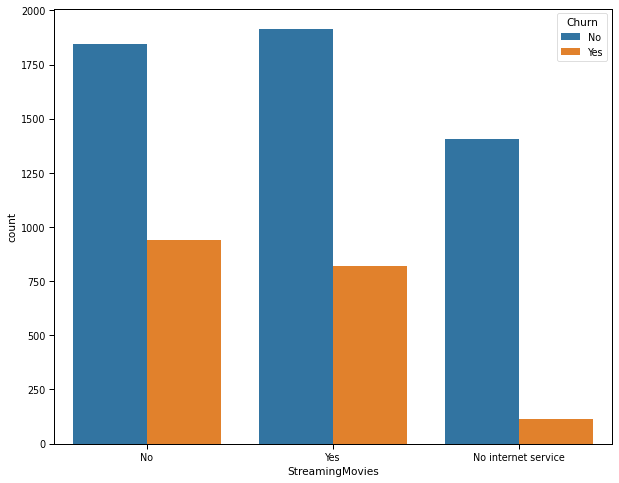

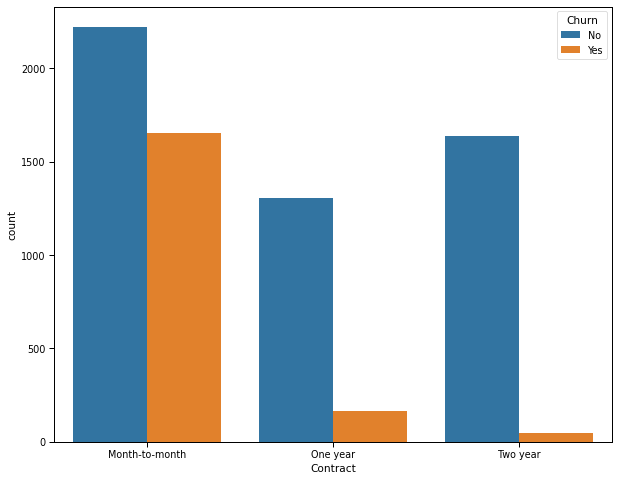

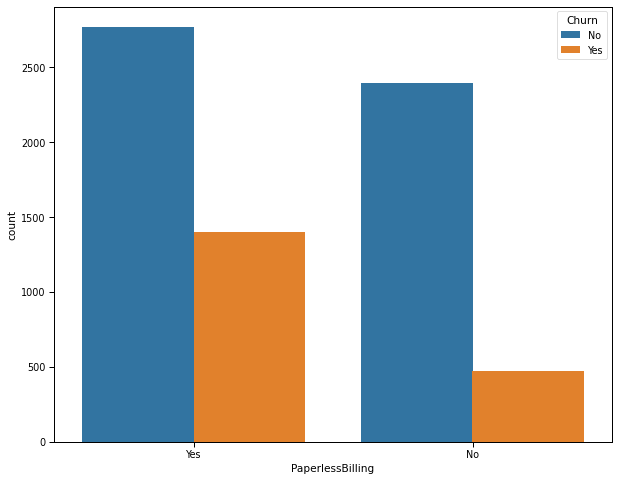

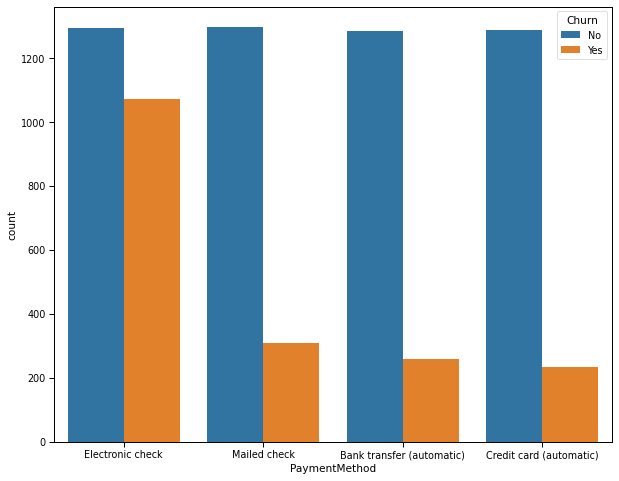

<Figure size 720x576 with 0 Axes>

In [82]:
# A for loop for all independent variables against the target(Churn)

for i, variables in enumerate(df1.drop(columns=['Churn','TotalCharges','MonthlyCharges', 'tenure'])):
  plt.figure(figsize=(10,8))
  plt.figure(i)
  sns.countplot(data=df1, x=variables, hue='Churn')

**Observation**



*   The churn rate is low in senior citizens.
*   The churn rate of both male and female is the same; gender has not effect on churn rate


*   Churn rate among those who have no partners is higher compared to those with partners.
*   Those who have no dependents are likely to churn services as compared to those with dependents.


*   Customers subscribed to phone services are more likely to churn as compared to those who are not subscribed.
*   The churn rate is not affected by the number of lines owned by a customer.


* Churn rate is high in customers who use Fibre Optic compared to those who use DSLand those without any internet service.
*  Customers having no online security tend to have a higher churn rate.


*   Customers without online backup services are likely to churn.
*  Customers without device protection are likely to churn.


*   Customers are likely to churn where there is no Tech Support.
*   Customers with monthly subscription tend to churn more as compared those with 1-2 year contract.


*  Customers who use paperless billing tend to churn more than those using paper billing. 
*   Churn rate among those customers using Electronic checks as a payment method is higher.















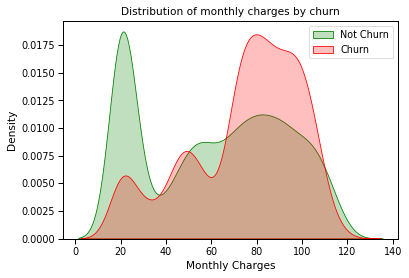

In [83]:
#visualizing the MonthlyCharges variable against churn
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],
                color="green", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],
                ax =ax, color="red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**Observation**
* Customers with higher Monthly Charges are also more likely to churn

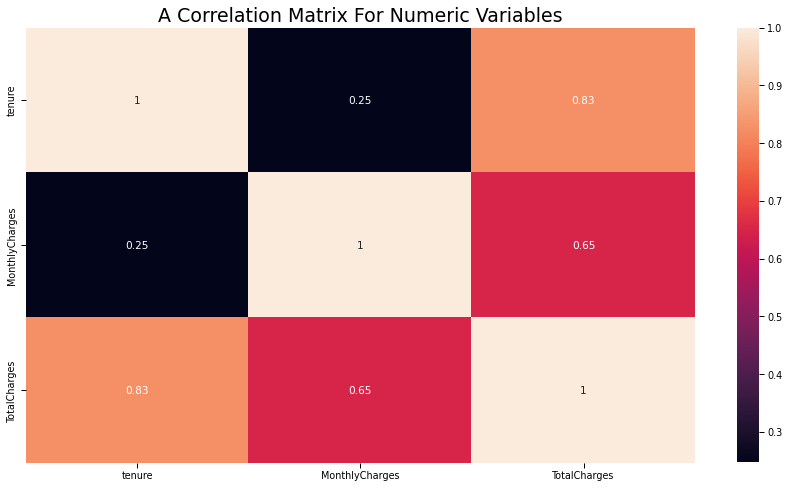

In [84]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,8))
plt.title('A Correlation Matrix For Numeric Variables', fontsize=19)
ax = sns.heatmap(df1.corr(), annot=True)

**Observations**


*   There is a strong positive correlation between Total Charges and Tenure.The longer a customer stays the more they pay.
*   There is a weak positive correlation between tenure and Monthly charges.









##**5. Implementing The Solution**

> Modeling in this phase will include selecting a deep learning technique;designing the test; building the model and assessing model

### 5.1 Data Pre-Processing

In [85]:
#encoding
from sklearn.preprocessing import LabelEncoder#importing label encoder library
#creating a function to label encode the categorical variables
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [86]:
#creating a new dataframe of numerical variables
df2 = df1.apply(lambda x: object_to_int(x))
df2.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Observation**

* We have transformed our previous dataframe into numeric variables

### 5.2 Modeling 

In [150]:
#importing the required libraries for creating neural networks
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD
from tensorflow.python.keras.layers import Input, Dense

In [151]:
#creating the x and y variables
X=df2.drop(['Churn'],axis=1)
y=df2['Churn']

**Observation**

* Split our dataset into X and y; y-churn and X are the other independent variables

In [152]:
# Define our model
# Use sequential;a linear stack of layers

model= Sequential()

In [153]:
# Specify our input layer; to ensure it has the right number of inputs using the
# input_dim argument 

input_dim=19


In [160]:
# Specify the dense class with the fully connected layers

model = Sequential()
model.add(Dense(15, input_dim=19, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))                       

**Observation**

* We have created our sequential model and added hidden layers.
* Used relu activation function in the hidden layers and sigmoid on the output
* The model expects rows of data with 19 variables
* The first hidden layer has 15 nodes; the second hidden  layer has 10 nodes and the output has just one node.

In [155]:
# Compile the model
# Specify the loss function, optimizer
#opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Observation**
* We have specified some additional properties required for training the network.

* We have specified the loss function (binary_crossentropy),the optimizer(adam) and the classification accuracy defined by the metrics argument.

In [157]:
# Fit the model
model.fit(X, y, epochs=15, batch_size=10)

Epoch 1/15
704/704 [==============================] - 2s 3ms/step - loss: 9.9307 - accuracy: 0.7160
Epoch 2/15
704/704 [==============================] - 2s 2ms/step - loss: 0.9648 - accuracy: 0.7561
Epoch 3/15
704/704 [==============================] - 2s 2ms/step - loss: 0.9307 - accuracy: 0.7564
Epoch 4/15
704/704 [==============================] - 2s 3ms/step - loss: 0.9826 - accuracy: 0.7561
Epoch 5/15
704/704 [==============================] - 2s 2ms/step - loss: 0.9136 - accuracy: 0.7577
Epoch 6/15
704/704 [==============================] - 2s 2ms/step - loss: 0.9637 - accuracy: 0.7548
Epoch 7/15
704/704 [==============================] - 2s 2ms/step - loss: 0.9171 - accuracy: 0.7582
Epoch 8/15
704/704 [==============================] - 2s 2ms/step - loss: 1.0702 - accuracy: 0.7575
Epoch 9/15
704/704 [==============================] - 2s 2ms/step - loss: 0.8877 - accuracy: 0.7592
Epoch 10/15
704/704 [==============================] - 2s 2ms/step - loss: 0.8080 - accuracy: 0.7607

**Observation**
* Now that we have defined and compliled our model to be ready for computaion, we are now ready to fit the model on the dataset.

* Use the .fit() function to fit our dataset.

* We have set our epoch to 15, and set our batches to 10 ie the number of samples considered by our model within an epoch before weights are updated.

In [158]:

# Evaluate performance of the model on the dataset using evaluate function.

accuracy = model.evaluate(X, y)

#print(accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1]*100))

220/220 [==============================] - 1s 2ms/step - loss: 1.2093 - accuracy: 0.7917
accuracy: 79.17%


**Observation**

* Trained the neural network on the entire dataset
* Used the .evaluate() function.

* The function returned two variables

1.   Loss of the model on the dataset (1.6105)
2.   Accuracy of the model on the dataset (79.17%) using 'option' optimizer.




## **6. Challenging The Solution**

> 

### 6.1 Use RMSProp Optimizer

In [128]:
#importing the required libraries for creating neural networks
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD
from tensorflow.python.keras.layers import Input, Dense

In [129]:
#creating the x and y variables
X=df2.drop(['Churn'],axis=1)
y=df2['Churn']

In [161]:
# Define our model
# Use sequential;a linear stack of layers

model11= Sequential()

In [162]:
# Specify our input layer; to ensure it has the right number of inputs using the
# input_dim argument 

input_dim=19


In [163]:
# Specify the dense class with the fully connected layers

model11 = Sequential()
model11.add(Dense(15, input_dim=19, activation='relu'))
model11.add(Dense(10, activation='relu'))
model11.add(Dense(1,activation='sigmoid'))                       

In [164]:
# Compile the model
# Specify the loss function, optimizer
#opt=SGD(lr=0.01, momentum=0.9)
model11.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [165]:
# Fit the model
model11.fit(X, y, epochs=15, batch_size=10)

Epoch 1/15
704/704 [==============================] - 3s 2ms/step - loss: 2.3266 - accuracy: 0.7288
Epoch 2/15
704/704 [==============================] - 2s 2ms/step - loss: 0.8729 - accuracy: 0.7332
Epoch 3/15
704/704 [==============================] - 2s 2ms/step - loss: 0.8238 - accuracy: 0.7425
Epoch 4/15
704/704 [==============================] - 2s 2ms/step - loss: 0.7922 - accuracy: 0.7506
Epoch 5/15
704/704 [==============================] - 2s 2ms/step - loss: 0.7466 - accuracy: 0.7489
Epoch 6/15
704/704 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.7555
Epoch 7/15
704/704 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.7568
Epoch 8/15
704/704 [==============================] - 1s 2ms/step - loss: 0.6758 - accuracy: 0.7597
Epoch 9/15
704/704 [==============================] - 2s 2ms/step - loss: 0.6445 - accuracy: 0.7631
Epoch 10/15
704/704 [==============================] - 1s 2ms/step - loss: 0.6360 - accuracy: 0.7631

In [169]:

# Evaluate performance of the model on the dataset using evaluate function.

accuracy = model11.evaluate(X, y)
print("%s: %.2f%%" % (model11.metrics_names[1], accuracy[1]*100))

220/220 [==============================] - 1s 4ms/step - loss: 0.4318 - accuracy: 0.7956
accuracy: 79.56%


**Observation**

* The accuracy of the model has increased to 79.16% when using RMSprop optimizer

### 6.2 XGBoost

In [136]:
# Create the train and test dataset

#Import the train-test split
from sklearn.model_selection import train_test_split

# Divide into train and test sets
train_X, test_X, train_y, test_y=train_test_split(X,y, test_size=0.30, random_state= 101, stratify=y)

In [137]:
#XGBOOST
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = XGBClassifier()
model.fit(train_X, train_y)

XGBClassifier()

In [138]:
# make predictions for test data
y_pred = model.predict(test_X)
predictions = [round(value) for value in y_pred]

In [139]:
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.95%


In [140]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,predictions))
print(classification_report(test_y, predictions))

[[1421  128]
 [ 274  287]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



**Observation**
* XGBoost achieves an accuracy of 81% 

* 1421 samples were correctly predicted

* 128 samples were incorrectly as positive

> XGBoost algorithm correctly predicts the customer churn rate than our deep learning algorithm.

## **7. Conclusion**

Customer churn is unfavorable to a company's profitablity. Several strategies should be implemented to lower the churn rate. In this case; 

* Churn rate is high in customers who use Fibre Optic compared to those who use DSLand those without any internet service.
* Customers having no online security tend to have a higher churn rate.
* Customers without online backup services are likely to churn.
* Customers are likely to churn where there is no Tech Support.
* Customers with monthly subscription tend to churn more as compared those with 1-2 year contract.
* Customers who use paperless billing tend to churn more than those using paper billing.

## **8. Recommendation**

The telecom industry should consider the following recommendations to reduce customer churn rate;

* Improve on Fibre Optic speed and connectivity
* Enhance the security measures
* Offer encrypted data storage services
* Ensure timely responses to the customer queries
* Offer affordable monthly packages